In [1]:
import pandas as pd 
import os
import numpy as np
# from astronomaly.base.base_dataset import Dataset

In [6]:
import pandas as pd 
import os
import numpy as np
# from astronomaly.base.base_dataset import Dataset


class LightCurveDataset(Dataset):
    def __init__(self,data_dict,header_nrows=1,delim_whitespace =False,**kwargs):
        """
        Reads in light curve data from file(s).

        Parameters
        ----------
        filename : str
            If a single file (of any time) is to be read from, the path can be
            given using this kwarg. 
        directory : str
            A directory can be given instead of an explicit list of files. The
            child class will load all appropriate files in this directory.
        list_of_files : list
            Instead of the above, a list of files to be loaded can be
            explicitly given.
        output_dir : str
            The directory to save the log file and all outputs to. Defaults to
            './' 
        
        data_dict: Dictionary
                It a dictionary with index of the column names corresponding to the 
                following specific keys: ('time','mag','mag_err','flux','flux_err','filters')
                
                e.g {'time':1,'mag':2}, were 1 and 2 are column index correpoding to 
                'time' and 'mag' in the input data 
                
                The user can also provide a list of indices for the 'mag' and 'flux' columns. This is the
                case were the brightness is recorded in more than one column.
                
                e.g {'time':1,'mag':[2,3]} 2 and 3 corresponds to columns with brightness records
        
        header_nrows: int
                The number of rows the header covers in the dataset, by 
                default 1
                
         delim_whitespace: bool
                Should be True if the data is not separated by a comma, by
                default False
                

        """

        super().__init__(data_dict,header_nrows=1,delim_whitespace =False,**kwargs)



        self.data_type = 'light_curve'
        self.metadata = pd.DataFrame(data=[])
        

        ##### need to understand this line of code!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # ids = [f.split(os.sep)[-1] for f in self.files]
        # self.metadata = pd.DataFrame({'filepath': self.files}, index=ids)

        

        self.data_dict = data_dict
        self.header_nrows = header_nrows
        self.delim_whitespace = delim_whitespace
     
        
#         ========================================================================================
                                   
                                    # Reading the light curve data 
        
#         ========================================================================================

        
        
        # Reading-in the data
        
        
        
        # ===================Case for multiple files of light curve data================================
        try:

            data=pd.concat([pd.read_csv(self.files[0],skiprows=self.header_nrows,
                               delim_whitespace=self.delim_whitespace,header=None),
                               
                               pd.read_csv(self.files[1],skiprows=self.header_nrows,
                                           delim_whitespace=self.delim_whitespace,header=None)])
            
            

            for fl in range(2,len(self.files)):

                data=pd.concat([data, pd.read_csv(self.files[fl],skiprows=self.header_nrows,
                               delim_whitespace=self.delim_whitespace,header=None)])
                
        
        # ===================Case for single file of light curve data==================================
        except IndexError:
            
            
            data = pd.read_csv(self.files[0],skiprows=self.header_nrows,
                               delim_whitespace=self.delim_whitespace,header=None)

            

        

        
        # ==================Magnitudes==================================
        # ==============================================================
        Id = data.iloc[:,self.data_dict['id']]
        time = data.iloc[:,self.data_dict['time']]
        
        standard_data = {'ID':Id,'time':time}
        
        if 'mag' in self.data_dict.keys(): 
            
            
            # ============MUtliple Mag columns=========================
            
            # The case of multiple brightness columns        
            try:
                
                
        
                for i in range(len(self.data_dict['mag'])):
                    
                    
                    # Separatting the columns as per input dictionary
    #             

                    # Case where there are brightness error columns
                    if 'mag_err' in self.data_dict.keys():                

                        # Creating a new dictionary for the columns above separate data
                        standard_data.update({'mag'+str(i+1):data.iloc[:,self.data_dict['mag'][i]],
                                              'mag_error'+str(i+1):data.iloc[:,self.data_dict['mag_err'][i]]})

                    # Case were there are no error columns
                    else:

                        standard_data.update({'mag'+str(i+1):data.iloc[:,self.data_dict['mag'][i]]})
                    
                    
            
                
            #=================Single Mag Column with and with errors============================
            
            # Case of single brightness columns    
            except TypeError:    
                
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; mag = data.iloc[:,self.data_dict['mag']]; 
                
                if 'mag_err' in self.data_dict.keys():
                    
                    
                    mag_error = data.iloc[:,self.data_dict['mag_err']]
                    # Creating a new dictionary for the columns above separate data
                    standard_data.update({'mag':mag,'mag_error':mag_error})
                    
                else:
                    
                    standard_data.update({'mag':mag})
                            
            
            
                    
            # ============Column with Mag_filters and errors==========================
            
            # Including filters in dataframe
            if 'filters'in self.data_dict.keys() and 'mag_err' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; mag = data.iloc[:,self.data_dict['mag']];
                mag_error = data.iloc[:,self.data_dict['mag_err']]

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'mag':mag,'mag_error':mag_error,'filters':filters})
                
            elif 'filters' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; mag = data.iloc[:,self.data_dict['mag']];
        

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'mag':mag,'filters':filters})
                
                
                
                    
                    
    #-----------------------------------------------------------------------------------------------------------------                
                
    #`````````````````````````````````````````````````````````````````````````````````````````````````````````````````      
    #============================================Fluxes===============================================================
    #=================================================================================================================
    #`````````````````````````````````````````````````````````````````````````````````````````````````````````````````
            
        else:
            
            
            
                    # ============MUtliple Mag columns=========================
            
            # The case of multiple brightness columns        
            try:
                
                
        
                for i in range(len(self.data_dict['flux'])):
                    
                    
                    # Separatting the columns as per input dictionary
    #             

                    # Case where there are brightness error columns
                    if 'flux_err' in self.data_dict.keys():                

                        # Creating a new dictionary for the columns above separate data
                        standard_data.update({'flux'+str(i+1):data.iloc[:,self.data_dict['flux'][i]],
                                              'flux_error'+str(i+1):data.iloc[:,self.data_dict['flux_err'][i]]})
                    # Case were there are no error columns
                    else:

                        standard_data.update({'flux'+str(i+1):data.iloc[:,self.data_dict['flux'][i]]})
                    
                    
                    
            except TypeError:    
                
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; flux = data.iloc[:,self.data_dict['flux']]; 

                if 'flux_err' in self.data_dict.keys():


                    flux_error = data.iloc[:,self.data_dict['flux_err']]
                    # Creating a new dictionary for the columns above separate data
                    standard_data.update({'flux':flux,'flux_error':flux_error})

                else:

                    standard_data.update({'flux':flux})


            
                    
            # ============Column with Mag_filters and errors==========================
            
            # Including filters in dataframe
            if 'filters'in self.data_dict.keys() and 'flux_err' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; flux = data.iloc[:,self.data_dict['flux']];
                flux_error = data.iloc[:,self.data_dict['flux_err']]

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'flux':flux,'flux_error':flux_error,'filters':filters})
                
            elif 'filters' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; flux = data.iloc[:,self.data_dict['flux']];
        

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'flux':flux,'filters':filters})
                
                
                
                
            #=================Single Mag Column with and with errors============================
            
            # Case of single brightness columns    
          
            
        ids = np.unique(standard_data['ID'])   
        self.metadata = pd.DataFrame({'ID': ids}, index=ids)
        self.light_curves_data = pd.DataFrame.from_dict(standard_data)
    
    def get_display_data(self, idx):
        """
        Returns a single instance of the dataset in a form that is ready to be
        displayed by the web front end.

        Parameters
        ----------
        idx : str
            Index (should be a string to avoid ambiguity)

        Returns
        -------
        dict
            json-compatible dictionary of the light curve data
        """
 


        # All the standard columns are included here
        data_col = ['mag','flux','mag1','mag2','flux1','flux2','filters']

        err_col = ['mag_error','flux_error']

        out_dict = {}


            
        # Reading in the light curve data

        light_curve = self.light_curves_data[self.light_curves_data['ID']==idx]

        # Data and error index 
        mag_indx = [cl for cl in data_col if cl in light_curve.columns.values.tolist()] 
        err_indx = [cl for cl in err_col if cl in light_curve.columns.values.tolist()]




        # Returns true if we have error columns
        if err_col[0] in light_curve.columns.values.tolist() or err_col[1] in light_curve.columns.values.tolist():


            light_curve['err_lower'] = light_curve[mag_indx].values - light_curve[err_indx].values
            light_curve['err_upper'] = light_curve[mag_indx].values + light_curve[err_indx].values
            lc_errs = light_curve[['time', 'err_lower', 'err_upper']]



        
        # inserting the time column to data and adding 'data'
        # and 'errors' to out_dict
        mag_indx.insert(0,'time')
        out_dict['data'] = light_curve[mag_indx].values.tolist()
        out_dict['errors'] = lc_errs.values.tolist()

        
        return out_dict
    

    def get_sample(self,idx):
        
        
        # All the standard columns for feature extraction 
        data_col = ['time','mag','flux','mag1','mag2','flux1','flux2','mag_error','flux_error']

        

        # empty pandas dataframe to update as per data_col
        out_data = pd.DataFrame({})
        try:

            
   
            # Choosing light curve values for a specific ID
            light_curve = self.light_curves_data[self.light_curves_data['ID']==idx]
            
            
            sample_data = []
            # Getting the columns that correspond to lc columns 
            for cl in data_col:
                
                if cl in light_curve.columns.values.tolist():

                    out_data[cl] = light_curve[cl].values.tolist()
                    sample_data.append(out_data[cl])
            
                
            
        except (pd.errors.ParserError, pd.errors.EmptyDataError, FileNotFoundError) as e:
            print('Error parsing file', flpath)
            print('Error message:')
            print(e)
            out_dict = {'data': [], 'errors': []}
            
            
            
        return sample_data


NameError: name 'Dataset' is not defined

In [1]:
import pandas as pd 
import os
import numpy as np
# from astronomaly.base.base_dataset import Dataset


class LightCurveDataset(object):
    def __init__(self,data_dict,files,header_nrows=1,delim_whitespace =False,**kwargs):
        """
        Reads in light curve data from file(s).

        Parameters
        ----------
        filename : str
            If a single file (of any time) is to be read from, the path can be
            given using this kwarg. 
        directory : str
            A directory can be given instead of an explicit list of files. The
            child class will load all appropriate files in this directory.
        list_of_files : list
            Instead of the above, a list of files to be loaded can be
            explicitly given.
        output_dir : str
            The directory to save the log file and all outputs to. Defaults to
            './' 
        
        data_dict: Dictionary
                It a dictionary with index of the column names corresponding to the 
                following specific keys: ('time','mag','mag_err','flux','flux_err','filters')
                
                e.g {'time':1,'mag':2}, were 1 and 2 are column index correpoding to 
                'time' and 'mag' in the input data .
                
                The user can also provide a list of indices for the 'mag' and 'flux' columns. This is the
                case were the brightness is recorded in more than one column.
                
                e.g {'time':1,'mag':[2,3]} 2 and 3 corresponds to columns with brightness records
        
        header_nrows: int
                The number of rows the header covers in the dataset, by 
                default 1
                
         delim_whitespace: bool
                Should be True if the data is not separated by a comma, by
                default False
                

        """

#         super().__init__(data_dict,header_nrows=1,delim_whitespace =False,**kwargs)



        self.data_type = 'light_curve'
        self.metadata = pd.DataFrame(data=[])
        

        ##### need to understand this line of code!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        # ids = [f.split(os.sep)[-1] for f in self.files]
        # self.metadata = pd.DataFrame({'filepath': self.files}, index=ids)

        

        self.data_dict = data_dict
        self.header_nrows = header_nrows
        self.delim_whitespace = delim_whitespace
        self.files = files
     
        
#         ========================================================================================
                                   
                                    # Reading the light curve data 
        
#         ========================================================================================

#     @staticmethod
#     def read_lc_from_file(self,flpath):

        
        '''Function to read the lc from the data
        
        Input:
        flpath: the location of the file
        
    
                
        Output:
       standardized pandas dataframe with lc data'''
        
        
        # Reading-in the data
        
        
        
        # ===================Case for multiple files of light curve data================================
        try:

            data=pd.concat([pd.read_csv(self.files[0],skiprows=self.header_nrows,
                               delim_whitespace=self.delim_whitespace,header=None),
                               
                               pd.read_csv(self.files[1],skiprows=self.header_nrows,
                                           delim_whitespace=self.delim_whitespace,header=None)])
            
            

            for fl in range(2,len(self.files)):

                data=pd.concat([data, pd.read_csv(self.files[fl],skiprows=self.header_nrows,
                               delim_whitespace=self.delim_whitespace,header=None)])
                
        
        # ===================Case for single file of light curve data==================================
        except IndexError:
            
            
            data = pd.read_csv(self.files[0],skiprows=self.header_nrows,
                               delim_whitespace=self.delim_whitespace,header=None)

            

        
        
        

        
        # ==================Magnitudes==================================
        # ==============================================================
        ID = data.iloc[:,self.data_dict['id']]
        time = data.iloc[:,self.data_dict['time']]
        
        standard_data = {'ID':ID,'time':time}
        if 'mag' in self.data_dict.keys(): 
            
            
            # ============MUtliple Mag columns=========================
            
            # The case of multiple brightness columns        
            try:
                
                
        
                for i in range(len(self.data_dict['mag'])):
                    
                    
                    # Separatting the columns as per input dictionary
    #             

                    # Case where there are brightness error columns
                    if 'mag_err' in self.data_dict.keys():                


                        # Creating a new dictionary for the columns above separate data
                        standard_data.update({'mag'+str(i+1):data.iloc[:,self.data_dict['mag'][i]],
                                              'mag_error'+str(i+1):data.iloc[:,self.data_dict['mag_err'][i]]})
                    # Case were there are no error columns
                    else:

                        standard_data.update({'mag'+str(i+1):data.iloc[:,self.data_dict['mag'][i]]})
                    
                    
            
                
            #=================Single Mag Column with and with errors============================
            
            # Case of single brightness columns    
            except TypeError:    
                
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; mag = data.iloc[:,self.data_dict['mag']]; 
                
                if 'mag_err' in self.data_dict.keys():
                    
                    
                    mag_error = data.iloc[:,self.data_dict['mag_err']]
                    # Updating the 'standard' dictionary for the columns above separate data
                    standard_data.update({'mag':mag,'mag_error':mag_error})
                    
                else:
                    
                    standard_data.update({'mag':mag})
                            
            
            
                    
            # ============Column with Mag_filters and errors==========================
            
            # Including filters in dataframe
            if 'filters'in self.data_dict.keys() and 'mag_err' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; mag = data.iloc[:,self.data_dict['mag']];
                mag_error = data.iloc[:,self.data_dict['mag_err']]

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'mag':mag,'mag_error':mag_error,'filters':filters})
                
            elif 'filters' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; mag = data.iloc[:,self.data_dict['mag']];
        

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'mag':mag,'filters':filters})
                
                
                
                    
                    
    #-----------------------------------------------------------------------------------------------------------------                
                
    #`````````````````````````````````````````````````````````````````````````````````````````````````````````````````      
    #============================================Fluxes===============================================================
    #=================================================================================================================
    #`````````````````````````````````````````````````````````````````````````````````````````````````````````````````
            
        else:
            
            
            
                    # ============MUtliple Mag columns=========================
            
            # The case of multiple brightness columns        
            try:
                
                
        
                for i in range(len(self.data_dict['flux'])):
                    
                    
                    # Separatting the columns as per input dictionary
    #             

                    # Case were there are brightness error columns
                    if 'flux_err' in self.data_dict.keys():                

                        flux_error = data.iloc[:,self.data_dict['flux_err']]
                        # Creating a new dictionary for the columns above separate data
                        standard_data.update({'flux'+str(i+1):data.iloc[:,self.data_dict['flux'][i]],
                                              'flux_error'+str(i+1):data.iloc[:,self.data_dict['flux_err'][i]]})
                    # Case were there are no error columns
                    else:

                        standard_data.update({'flux'+str(i+1):data.iloc[:,self.data_dict['flux'][i]]})
                    
                    
                    
            except TypeError:    
                
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; flux = data.iloc[:,self.data_dict['flux']]; 

                if 'flux_err' in self.data_dict.keys():


                    flux_error = data.iloc[:,self.data_dict['flux_err']]
                    # Creating a new dictionary for the columns above separate data
                    standard_data.update({'flux':flux,'flux_error':flux_error})

                else:

                    standard_data.update({'flux':flux})


            
                    
            # ============Column with Mag_filters and errors==========================
            
            # Including filters in dataframe
            if 'filters'in self.data_dict.keys() and 'flux_err' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; flux = data.iloc[:,self.data_dict['flux']];
                flux_error = data.iloc[:,self.data_dict['flux_err']]

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'flux':flux,'flux_error':flux_error,'filters':filters})
                
            elif 'filters' in self.data_dict.keys():
                
                # Separatting the columns as per input dictionary
                time = data.iloc[:,self.data_dict['time']]; flux = data.iloc[:,self.data_dict['flux']];
        

                filters = data.iloc[:,self.data_dict['filters']]
                standard_data.update({'flux':flux,'filters':filters})
                
                
                   
            #=================Single Mag Column with and with errors============================
            
            # Case of single brightness columns    
              
        ids = np.unique(standard_data['ID'])   
        self.metadata = pd.DataFrame({'ID': ids}, index=ids)
        self.light_curves_data = pd.DataFrame.from_dict(standard_data)
        
    
    def get_display_data(self, idx):
        """
        Returns a single instance of the dataset in a form that is ready to be
        displayed by the web front end.

        Parameters
        ----------
        idx : str
            Index (should be a string to avoid ambiguity)

        Returns
        -------
        dict
            json-compatible dictionary of the light curve data
        """
 


        # All the standard columns are included here
        data_col = ['mag','flux','mag1','mag2','flux1','flux2','filters']

        err_col = ['mag_error','flux_error']

        out_dict = {}


            
        # Reading in the light curve data

        light_curve = self.light_curves_data[self.light_curves_data['ID']==idx]

        # Data and error index 
        mag_indx = [cl for cl in data_col if cl in light_curve.columns.values.tolist()] 
        err_indx = [cl for cl in err_col if cl in light_curve.columns.values.tolist()]




        # Returns true if we have error columns
        if err_col[0] in light_curve.columns.values.tolist() or err_col[1] in light_curve.columns.values.tolist():


            light_curve['err_lower'] = light_curve[mag_indx].values - light_curve[err_indx].values
            light_curve['err_upper'] = light_curve[mag_indx].values + light_curve[err_indx].values
            lc_errs = light_curve[['time', 'err_lower', 'err_upper']]



        
        # inserting the time column to data and adding 'data'
        # and 'errors' to out_dict
        mag_indx.insert(0,'time')
        out_dict['data'] = light_curve[mag_indx].values.tolist()
        out_dict['errors'] = lc_errs.values.tolist()

            

        return out_dict
    

    def get_sample(self,idx):

        
  
        # Choosing light curve values for a specific ID
        light_curve_sample = self.light_curves_data[self.light_curves_data['ID']==idx]
        
        return light_curve_sample

In [4]:
path2 = ['/home/malema/Desktop/Malema_UWC_Work/Data/test_set_batch1.csv','/home/malema/Desktop/Malema_UWC_Work/Data/test_set_batch1.csv']
         
#          ,'/home/malema/Desktop/Malema_UWC_Work/Data/test_set_batch1.csv']

md = LightCurveDataset(data_dict={'time':1,'flux':3,'flux_err':4,'id':0,'fliters':2},files=path2,
                     delim_whitespace=False,header_nrows=1)



dsp = md.get_display_data(idx=14)
 
# lc[lc['Id']==40]

z = md.light_curves_data

ls = ['mag']
ls.insert(0,'time')
# md.get_sample

In [5]:
md.get_sample(13)

,ID,time,flux,flux_error
0,13,59798.3205,-1.299735,1.357315
1,13,59798.3281,-2.095392,1.148654
2,13,59798.3357,-0.923794,1.763655
3,13,59798.3466,-4.009815,2.602911
4,13,59798.3576,-3.403503,5.367328
...,...,...,...,...
325,13,60652.1289,2.063019,0.939241
326,13,60652.1365,0.914091,1.117558
327,13,60652.1441,8.505517,1.381162
328,13,60652.1550,20.247869,2.050198


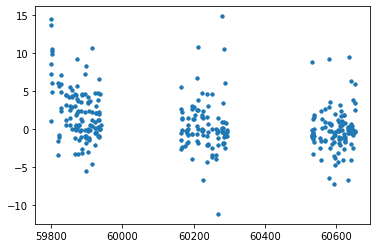

In [5]:
import matplotlib.pyplot as plt

plt.plot(np.array(dsp['data'])[:,0],np.array(dsp['data'])[:,1],'.')

# np.array(dsp['data'])[:,1]



In [75]:
v = md.light_curves_data[['mag']].values - md.light_curves_data[['ID']].values

In [32]:

err_col = ['mag_error','flux_error']

err_indx = [cl for cl in err_col if cl in z.columns.values.tolist()]

err_indx.append('time')

err_col.insert(0,'time')

# err_indx

err_col

['time', 'mag_error', 'flux_error']

# Testing if get_sample works

In [5]:
import feets

# The features from the light curves
fs = feets.FeatureSpace(

    only=['StructureFunction_index_21','Mean','AndersonDarling','Amplitude','Freq1_harmonics_rel_phase_1',
          'MaxSlope','LinearTrend','Beyond1Std','CAR_sigma','Period_fit','SlottedA_length',
          'SmallKurtosis','Autocor_length','Con','Eta_e'] ) 

lc = dsp
features, values = fs.extract(*lc)
val = values.tolist()

values

/home/malema/anaconda3/lib/python3.8/site-packages/feets/extractors/core.py:234: ExtractorWarning: The original FATS documentation says that the result of AndersonDarling must be ~0.25 for gausian distribution but the  result is ~-0.60
  warnings.warn(w, ExtractorWarning)


DataRequiredError: magnitude

In [ ]:
metadata

In [ ]:
files = [1,2,3,50]
metadata = pd.DataFrame({'filepath': files}, index=[20,2,3,50])
flpath = metadata['filepath'].iloc[3]
# metadata.keys()

flpath

In [ ]:
metadata.iloc[0].values[0]

In [ ]:
len(metadata)

dt = pd.read_csv(path2)

dt

# Practice 

In [ ]:
# dt1 = pd.DataFrame({'time':dt.mjd,'flux':dt.flux, 'flux_err':dt.flux_err }, index=dt.object_id.values)

dt1 = {'time':[1,2], 'mag':[2,4]}
dt2 = {'time':[1,2], 'mag':[1,2]}
dt3 = {'time':[2,3], 'mag':[2,3]}
dt4 = {'time':[0,0], 'mag':[0,0]}
# dt3 = {'time':[2,3], 'mag':[2,3]}


dt1 = pd.DataFrame(dt1);dt2 = pd.DataFrame(dt2); dt3 = pd.DataFrame(dt3);dt4 = pd.DataFrame(dt4)

# print(dt1)
# print(dt2)
# print(dt3)

lst = [dt1,dt2]
try:

    new_dat=pd.concat([lst[0],lst[1]])

    for i in range(2,len(lst)):

        new_dat=pd.concat([new_dat,lst[i]])
        
except IndexError:
    
    new_dat = lst[0]

new_dat

In [ ]:
dt1.loc[13,'time']

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0,1,50)

y = np.sin(x)


plt.plot(x,y)


In [ ]:
nutrition = {'food':['mango','banana','pap','eggs'],'kcal':[10,30,80,100],'kJ':np.array([90,30,10,5])}
 
nutrition['kJ'] = nutrition['kJ'] + 10

nutrition = pd.DataFrame.from_dict(nutrition)

nutrition

for kj in nutrition['food']:
    
    print(kj)

In [ ]:

plt.plot(nutrition.kcal,nutrition.kJ,'*r')
plt.xlabel('kcal')
plt.ylabel('kJ')

In [ ]:
dictn = {}
dictn1 = {}

fl1 = [1,2,3]
fl2 = [4,6,1]
fl3 = [20,4,5]
fl4 = [0,0,0]

dct = {'fl3':fl4}
# dct = pd.DataFrame.from_dict(dct)


files = [fl1,fl2,fl3]
files2 = [fl1,fl2,fl3]

for fls in range(len(files)):
    
    dictn['fl'+str(fls)] = files[fls]

dt = pd.DataFrame.from_dict(dictn)
    
for fls in range(len(files2)):
    
    dictn1['fl'+str(fls)] = files2[fls]
    
dt1 = pd.DataFrame.from_dict(dictn1) 

dt1


In [ ]:
dictn

In [ ]:
'malema'+'brigdet'

In [ ]:
pd.concat([dt,dt1])

In [ ]:
len(1)

In [ ]:
# dct['dt','ft','gt'] = [1,1,1],[2,2,2],[3,3,3]

dictn = {}
dct = {'fl3':fl4}


dct.update({'dt':[1,1,1],'ft':[2,2,2],'gt':[3,3,3]})

In [ ]:
dct

In [ ]:
x = np.array([1,2,3])


for i in range(len(x)):
    
    x[i] = 2

In [ ]:
mag_columns = [1,2,3]

mags = {}

cl = np.zeros(len(mag_columns))

for i in range(len(mag_columns)):
    
#     cl[i] = mag_columns[i]
    
    mags['mag'+str(i)] = i


In [ ]:
mags

In [9]:
import shap
from sklearn.ensemble import IsolationForest

# Load data and train Anomaly Detector as usual 
X_train, X_test, ...
est = IsolationForest()
est.fit(...)

# Create shap values and plot them
X_explain = X_test
shap_values = shap.TreeExplainer(est).shap_values(X_explain)
shap.summary_plot(shap_values, X_explain)

NameError: name 'X_train' is not defined

In [8]:
!conda install -c conda-forge shap

Solving environment: done

## Package Plan ##

  environment location: /home/malema/anaconda3

  added / updated specs:
    - shap


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38h578d9bd_0         3.0 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    shap-0.37.0                |   py38h0ef3d22_0         508 KB  conda-forge
    slicer-0.0.7               |     pyhd8ed1ab_0          16 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.6 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/linux-64::python_abi-3.8-1_cp38
  shap               conda-forge/linux-64::shap-0.37.0-py38h0ef3d22_0
  slicer             conda-forge/noarch::slicer-0.0.7-pyhd8ed1ab_0

The following packages will be